In [36]:
import os
import numpy as np

import torch
import torch.utils.data

import torchvision
import torchvision.models
import torchvision.transforms

import transforms
import copy

import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset

import matplotlib.pyplot as plt

In [9]:
dset = torchvision.datasets.MNIST('data', train=True, download=True, transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
        ]))

In [10]:
loader = torch.utils.data.DataLoader(dset, batch_size=100000, shuffle=False)

In [15]:
for images, labels in loader:
    break

In [16]:
images.shape, labels.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([60000]))

In [17]:
labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [24]:
labels[(labels == 0)].shape

torch.Size([5923])

In [31]:
num_per_class = 128

for cls in range(10):
    clsimages = images[(labels == cls)][:num_per_class]
    clslabels = labels[(labels == cls)][:num_per_class]
    
    if cls == 0:
        all_images = copy.deepcopy(clsimages)
        all_labels = copy.deepcopy(clslabels)
    else:
        all_images = torch.cat([all_images, clsimages])
        all_labels = torch.cat([all_labels, clslabels])

In [29]:
all_images.shape, all_labels.shape

(torch.Size([1280, 1, 28, 28]), torch.Size([1280]))

In [33]:
minimnist = TensorDataset(all_images, all_labels)

In [34]:
miniloader = torch.utils.data.DataLoader(minimnist, batch_size=10, shuffle=True)
for images, labels in miniloader:
    break

tensor(3)


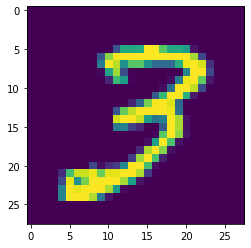

------
tensor(0)


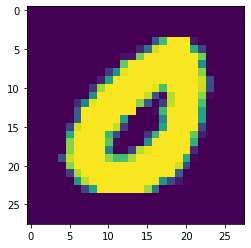

------
tensor(0)


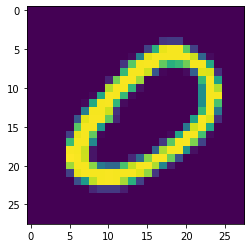

------
tensor(4)


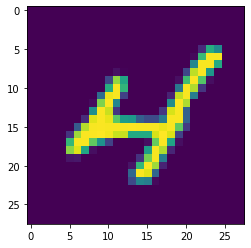

------
tensor(2)


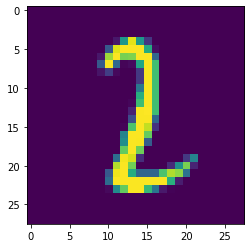

------
tensor(0)


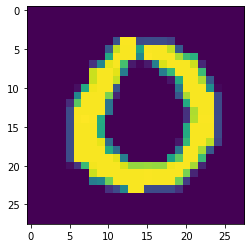

------
tensor(9)


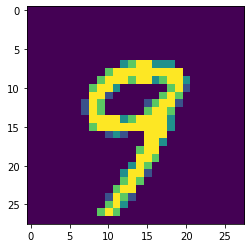

------
tensor(1)


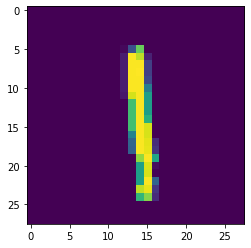

------
tensor(7)


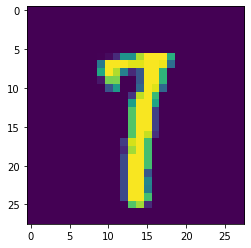

------
tensor(6)


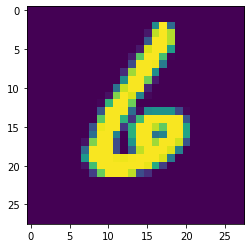

------


In [37]:
for i in range(10):
    print(labels[i])
    plt.imshow(images[i].squeeze().numpy())
    plt.show()
    print("------")

In [39]:
torch.bincount(all_labels)

tensor([128, 128, 128, 128, 128, 128, 128, 128, 128, 128])

In [40]:
torch.max(labels).item()

9